# 6.5 Machine Learning Clustering

### This contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing Visualization Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#creating pathway for dataframes
path = os.path.join(r'/Users/katja/Documents/Airbnb/02 Data')

In [33]:
#import Airbnb Amsterdam csv
df = pd.read_csv(os.path.join(path, 'Prepared Data','2023_Amsterdam_Airbnb_Data_updated.csv'), index_col = False)

In [6]:
#loading garbage collector
import gc

In [9]:
df.head()

,listing_id,host_id,host_listings_count,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood,latitude,...,number_of_reviews,reviews_per_month,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_location,review_scores_communication,airbnb availability,price category
0,2818,3159,1,2008/09/24,within an hour,100,Superhost,Host Profile Pic,Oostelijk Havengebied Indische Buurt,52.36435,...,365,2.04,51,2009/03/30,2023/11/27,4.90,4.71,4.98,No Availability,low price
1,20168,59484,2,2009/12/02,within an hour,100,Not a Superhost,Host Profile Pic,CentrumOost,52.36407,...,366,2.18,30,2010/03/02,2023/12/10,4.44,4.88,4.61,No Availability,middle price
2,27886,97647,1,2010/03/23,within an hour,100,Superhost,Host Profile Pic,CentrumWest,52.38761,...,267,1.84,24,2012/01/09,2023/11/19,4.93,4.89,4.92,No Availability,middle price
3,28871,124245,2,2010/05/13,within an hour,100,Superhost,Host Profile Pic,CentrumWest,52.36775,...,569,3.51,116,2010/08/22,2023/12/10,4.87,4.94,4.93,No Availability,low price
4,29051,124245,2,2010/05/13,within an hour,100,Superhost,Host Profile Pic,CentrumOost,52.36584,...,698,4.50,97,2011/03/16,2023/12/08,4.81,4.88,4.92,No Availability,low price


In [47]:
#select necessary columns, can't use strings

df = df[[ 'price', 
          'host_listings_count','host_response_rate',
         'number_of_reviews',
          'review_scores_rating', 'review_scores_location','review_scores_communication',
          'latitude','longitude'
         ]]

### 2. The elbow technique

In [48]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.''

In [49]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/katja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

[-148234021.98141336,
 -87852830.0314588,
 -56427530.43455684,
 -40339044.6184704,
 -31040195.264595594,
 -23740219.568678755,
 -19761194.9565639,
 -16724881.526117107,
 -14863289.388077483]

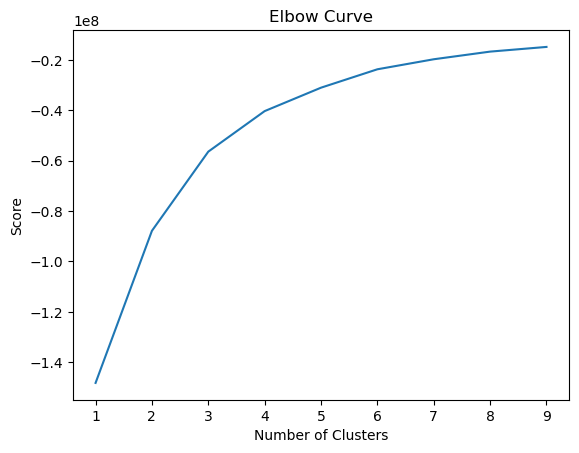

In [50]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a break from two to three on the x-axis. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [72]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [73]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/katja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [74]:
df['clusters'] = kmeans.fit_predict(df)

/Users/katja/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [75]:
df.head()

,price,host_listings_count,host_response_rate,number_of_reviews,review_scores_rating,review_scores_location,review_scores_communication,latitude,longitude,clusters
0,69.0,1,100,365,4.90,4.71,4.98,52.36435,4.94358,1
1,117.0,2,100,366,4.44,4.88,4.61,52.36407,4.89393,1
2,155.0,1,100,267,4.93,4.89,4.92,52.38761,4.89188,1
3,79.0,2,100,569,4.87,4.94,4.93,52.36775,4.89092,1
4,59.0,2,100,698,4.81,4.88,4.92,52.36584,4.89111,1


In [76]:
df['clusters'].value_counts()

clusters
0    3070
2    1335
1     442
Name: count, dtype: int64

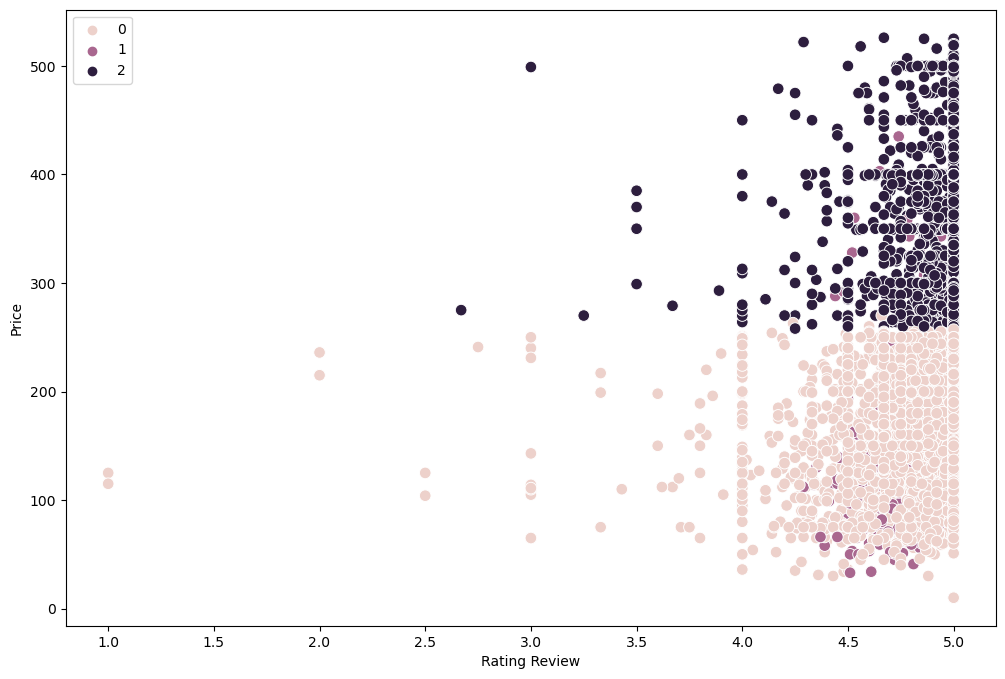

In [77]:
#Plot price vs total review score

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['review_scores_rating'], y=df['price'], hue=kmeans.labels_, s=70) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rating Review') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### This chart shows the clusters based on price vs the rating review. 

The lower price Airbnb rentals (>= 250 €) seem to have more frequent low ratings compare to the higher pricing Airbnb rentals (< 250€). 4.0, 4.5 & 5 are the most common rating that span the whole price range. This might show how some rentals are missing the mark entirely on some variables.
The high pricing Airbnb rentals have no ratings below 2.5 and the majority ratings are between 4.5 and 5. 

The purple group is mixed with the low price (light purple) and high price Airbnb (dark purple)group and does not stand out as a cluster. It doesn't show any ratings below 4.5 and is spread out through all price ranges.

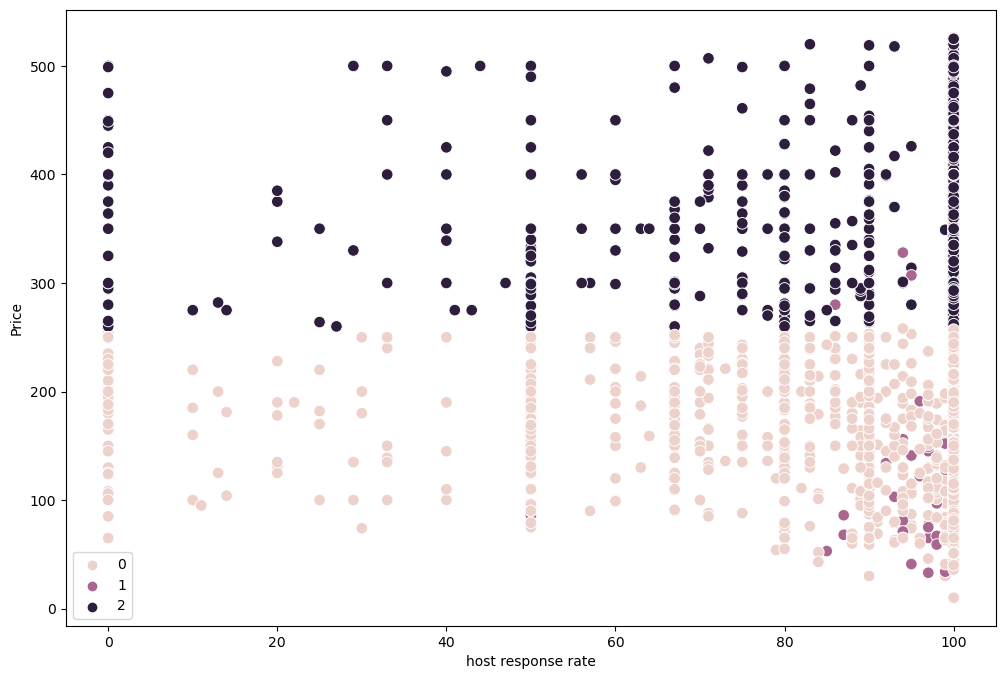

In [78]:
#Plot price vs host response rate

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['host_response_rate'], y=df['price'], hue=kmeans.labels_, s=70) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('host response rate') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### This chart shows the clusters based on price vs the host response rate.

There are two clusters standing out again. The Low Price Range in light purple (>= 250 €) and High Price Range in dark purple (< 250 €). 

The purple group is mixed with the less expensive (light purple) and expensive Airbnb (dark purple)group and does not stand out as a cluster. It doesn't show a response rate below 83% and is spread out through all price ranges till 320€. 

The lower price Airbnb rentals seem to have more frequent host response rate compare to the high pricing Airbn rentals meaning when contacting a host of a lower price Airbnb rental there is a high changes to get a response rate between 80 -100%. 

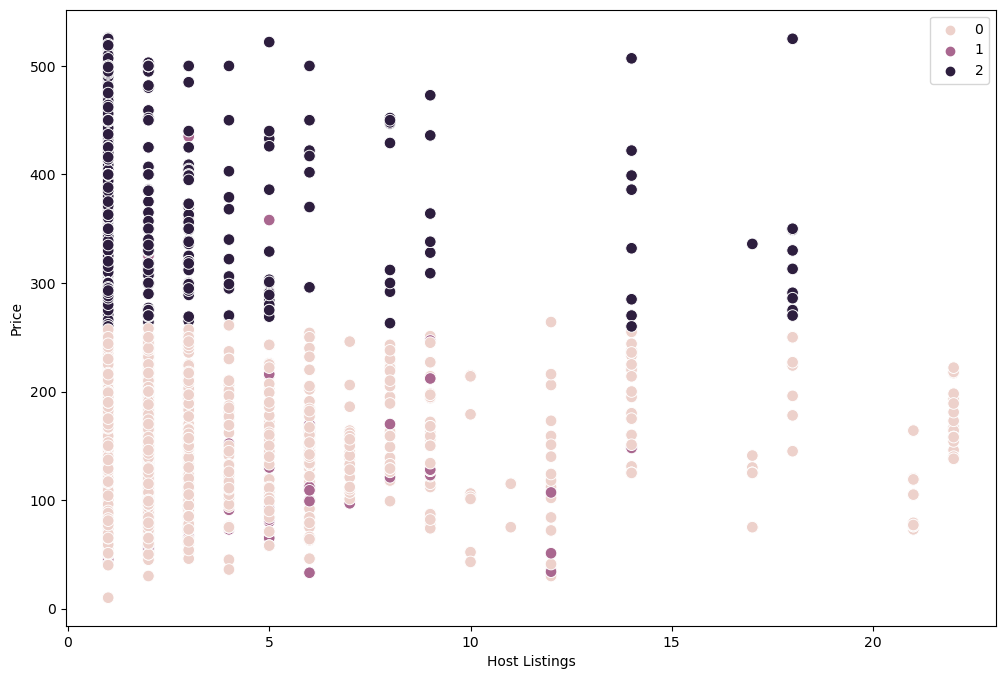

In [83]:
#Plot price vs host listing

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['host_listings_count'], y=df['price'], hue=kmeans.labels_, s=70) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Host Listings') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### This chart shows the clusters based on price vs the host listings.

There are two clusters standing out again. 

The Low Price Range in light purple (>= 250 €) and High Price Range in dark purple (< 250 €). The purple group is mixed with the less expensive (light purple) and expensive Airbnb (dark purple)group and does not stand out as a cluster. It doesn't show a host listings above 15 listings and is spread out through all price ranges till 320€. 

The lower price Airbnb rentals seem to have more spread out in their host listing compare to the high pricing Airbn rentals meaning host of high price Airbnb have most likley less listings listed compare to hosts of the lower price Airbnb rentals.

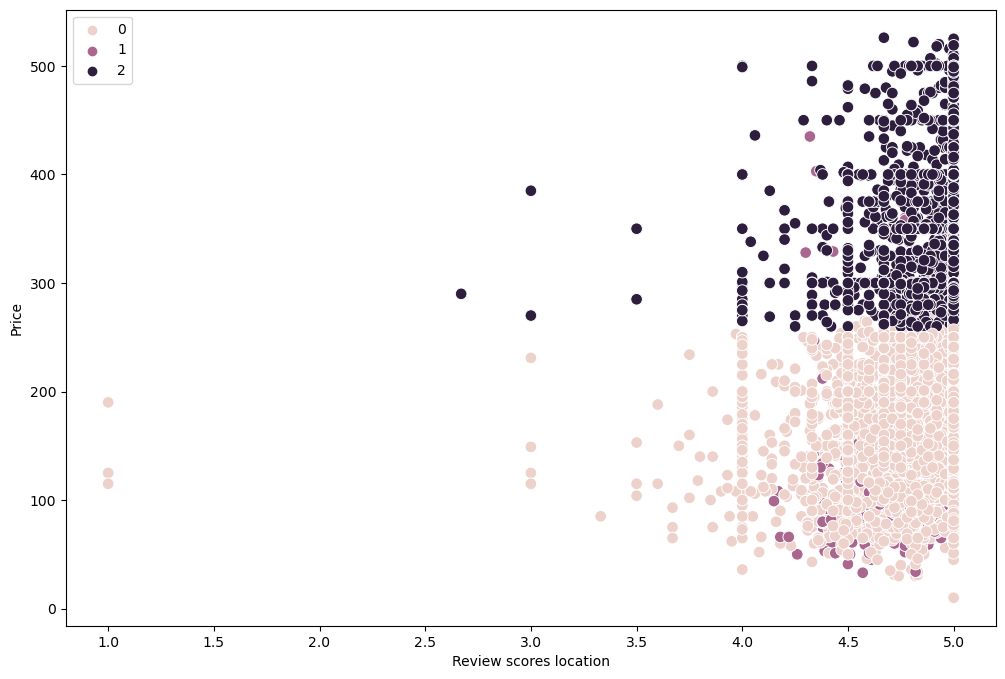

In [80]:
#Plot price vs review scores location

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['review_scores_location'], y=df['price'], hue=kmeans.labels_, s=70) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review scores location') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### This chart shows the clusters based on price vs review scores location

There are two clusters standing out again.

This chart shows the clusters based on price vs review score location.There are two clusters standing out again. The Low Price Range in light purple (>= 250 €) and High Price Range in dark purple (< 250 €). The purple cluster is mixed with the less expensive (light purple) and expensive Airbnb (dark purple) group and does not stand out as a single cluster. The purple cluster only ranges from 4.2 till 5.0. 

The review score location is more widley spread out in the light purple/ low price cluster and ranges from 1.0 till 5.0. It is densly clustered around the higher review score communication from 4.0 till 5.0. Whereas the higher price cluster in dark purple is less spread out and only got few ratings below 4.0 till 2.5. The most ratings range from 4.5 till 5.0, meaning high price Airbnb rentals above 300€ if given a review are mainly high rated locations. 

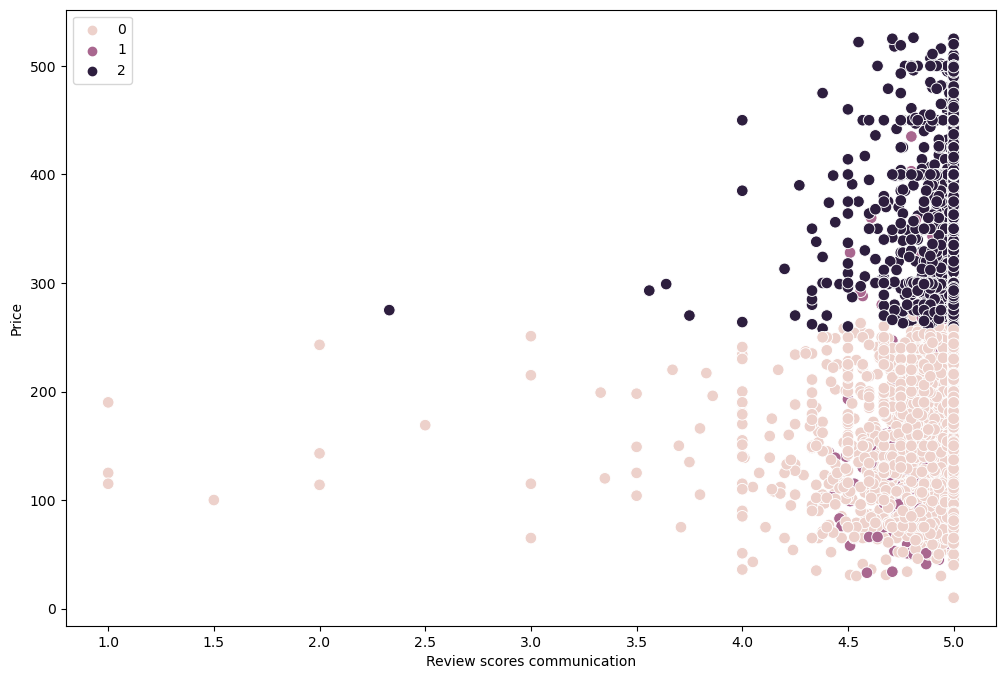

In [82]:
#Plot price vs review scores communication

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['review_scores_communication'], y=df['price'], hue=kmeans.labels_, s=70) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review scores communication') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### This chart shows the clusters based on price vs review scores communication

There are two clusters standing out again.

This chart shows the clusters based on price vs review score communication.There are two clusters standing out again. The Low Price Range in light purple (>= 250 €) and High Price Range in dark purple (< 250 €). The purple group is mixed with the less expensive (light purple) and expensive Airbnb (dark purple) group and does not stand out as a single cluster. The purple cluster only ranges from 4.5 till 5.0. 

The review score communication is most spread out in the light purple/ low price cluster and ranges from 1.0 till 5.0. It is densly clustered around the higher review score communication from 4.5 till 5.0. Whereas the higher price cluster in dark purple is less spread out and only got few ratings below 4.0 till 2.5. The most ratings range from 4.8 till 5.0, meaning high price Airbnb rentals above 300€ responding well. 

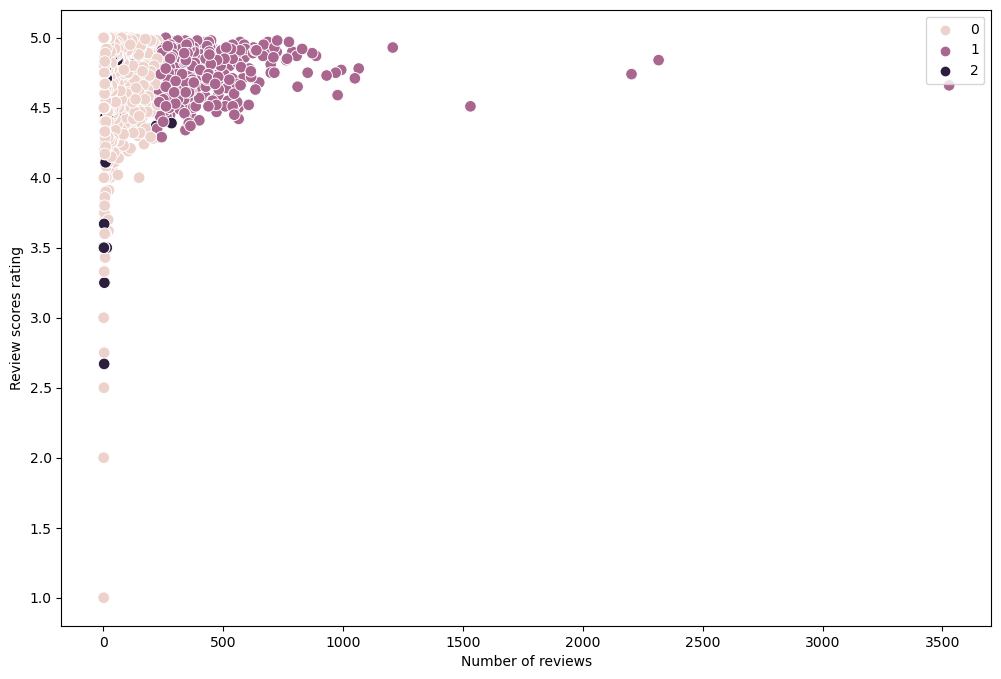

In [92]:
#Plot number of number of reviews vs review scores rating

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_of_reviews'], y=df['review_scores_rating'], hue=kmeans.labels_, s=70) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of reviews') # Label x-axis.
plt.ylabel('Review scores rating') # Label y-axis.
plt.show()

#### This chart shows the clusters based on review scores rating vs the number of reviews.

There are two clusters standing out again.

Using the number of reviews variable reveals the third cluster the purple cluster. The purple cluster seems to be defined by all Airbnb rentals with a 'High Number of Reviews' cluster ranging from 300 reviews till 3500 reviews, meaning if the number of reviews reaches over 330 reviews the review score rating will be above 4.2. 
The second cluster is the light purple group, clustering with reviews from 0 till 300. The cluster is more dense around the review score rating 4.0 -5.0 but also contains review score rating along the full score rating range till 0. The dark purple cluster is mixed with the light purple cluster and purple cluster. It seem to contain review score rating from 2.7. till 5.0.

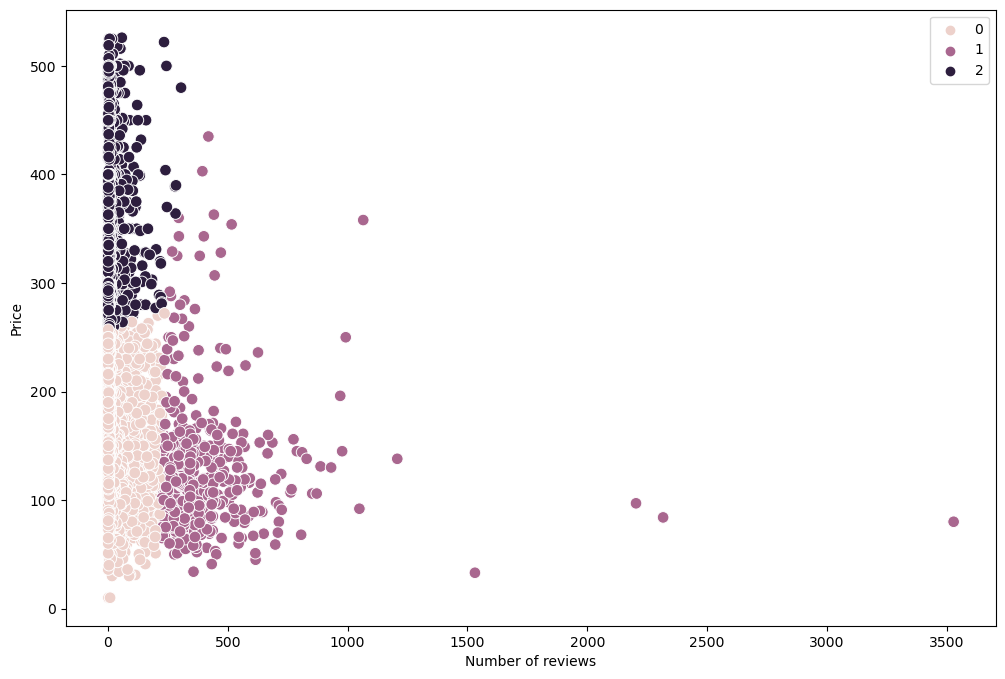

In [93]:
#Plot number of reviews vs price

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_of_reviews'], y=df['price'], hue=kmeans.labels_, s=70) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of reviews') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### This chart shows the clusters based on price vs the number of reviews.

There are all thre clusters standing out this time.

Using the number of reviews variable before revealed the third cluster the purple cluster. The light purple group represents the group of lower price Airbnb rentals who got reviews till 250 reviews. The purple cluster is densly spread out in the lower price Airbnb range but also got few rentals till 400 € price range and a high number of reviews densly till 1000 reviews but ranges till 3500 assuming that this rental being in the low price range is being popular and booked often in the past. 
The dark purple cluster shows the higher price range from 250€ and above, with a lower amount of reviews reaching from 0 till 250. 

Overall can be said that the price range till 200 € receives the mosst number of reviews, meaning this price range seemed to be the most popular one among the bookings of Airbnb rentals.

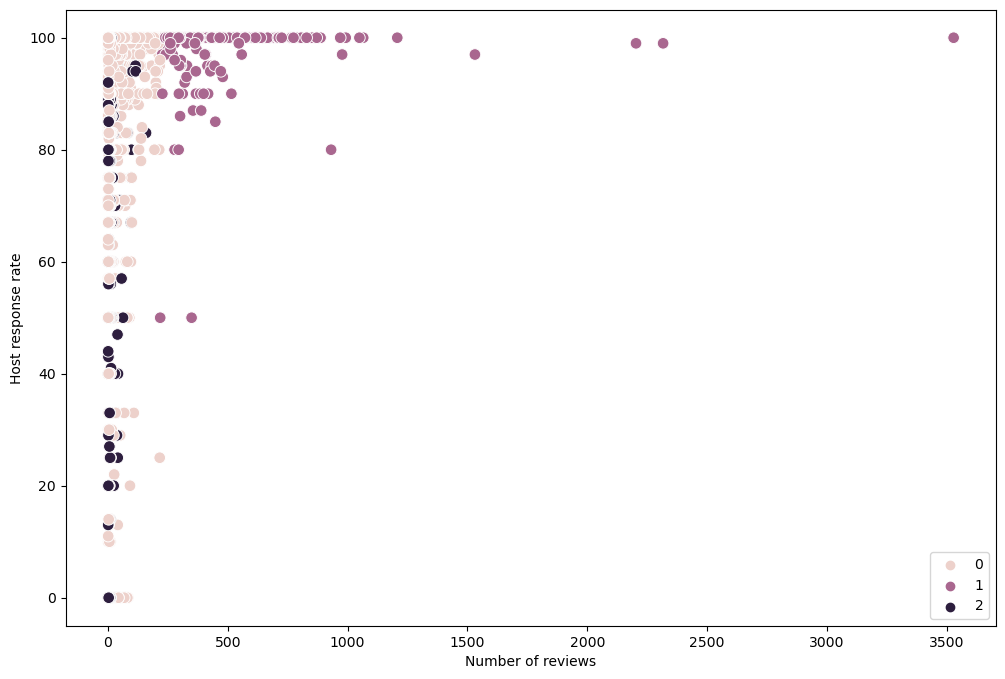

In [94]:
#Plot number of reviews vs hos response rate

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_of_reviews'], y=df['host_response_rate'], hue=kmeans.labels_, s=70) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of reviews') # Label x-axis.
plt.ylabel('Host response rate') # Label y-axis.
plt.show()

#### This chart shows the clusters based on host response rate vs the number of reviews.

There are two clusters standing out again.

The purple cluster seems to be defined by all Airbnb rentals with a 'High Number of Reviews' cluster ranging from 300 reviews till 3500 reviews, and is densly spread out within a host response rate of 85 till 100%, meaning if the host has a high response rate, there is a high change of getting a higher number of reviews, meaning bookings within this cluster. 

The second cluster is the light purple group, clustering with reviews from 0 till 300. The cluster is more spread out and more dense around the host respons rate from 80% till 100 % but also contains host response rates along the full score rating range till 0%. The dark purple cluster is mixed with the light purple cluster. It seem to contain host response rating from 0% till 95%.

In [96]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'light purple'

In [97]:
df.groupby('cluster').agg({'host_listings_count':['mean', 'median'], 
                         'price':['mean', 'median'], 
                         'host_response_rate':['mean', 'median'],
                          'number_of_reviews':['mean', 'median'],
                          'review_scores_rating':['mean', 'median'], 
                         'review_scores_location':['mean', 'median'],
                          'review_scores_communication':['mean', 'median'],
                            })

host_listings_count              price        host_response_rate  \
                            mean median        mean median               mean   
cluster                                                                         
dark purple             1.501873    1.0  352.047191  336.0          92.534831   
light purple            2.239088    1.0  167.942345  170.0          94.187622   
purple                  1.929864    1.0  128.726244  116.0          99.022624   

                    number_of_reviews        review_scores_rating         \
             median              mean median                 mean median   
cluster                                                                    
dark purple   100.0         20.966292    8.0             4.880539   5.00   
light purple  100.0         39.037785   15.0             4.806495   4.89   
purple        100.0        408.022624  352.0             4.784864   4.82   

             review_scores_location        review_scores_communication         
                               mean median                        mean median  
cluster                                                                        
dark purple                4.854974  4.940                    4.932000   5.00  
light purple               4.774521  4.840                    4.877192   4.97  
purple                     4.791584  4.845                    4.876290   4.93

## 10a. Propose what these results could be useful in future steps of an analytic pipeline

The descriptive statistics can be used to categorize properties and dive deeper into those categories further down the analytics pipeline. They show how the clusters were formed based on price and number of reviews. The variance within the clusters tells of their density.

In [100]:
# delete df to save space 

del num_cl
del kmeans
del score
del ax
del df 
gc.collect()

38678